## Pynini

In [1]:
# if you have MacOS you need conda to install Pynini, otherwise pip is ok
import pynini as pn
from pynini.lib import pynutil, byte
import string

In [2]:
_space = pn.accep(" ")
_mayspace = pn.closure(_space, 0, 1)
_period = pn.accep(".")
_thousand_separator = _period

_digit = pn.union(*string.digits)
_english_letters_upper = pn.string_map([chr(i) for i in range(65, 91)])
_english_letters_lower = pn.string_map([chr(i) for i in range(97, 123)])

_english_letters = pn.union(_english_letters_lower, _english_letters_upper)

_czech_letters_lower = pn.union(*"ěščřžýáíéóúůďťň")
_czech_letters_upper = pn.union(*"ĚŠČŘŽÝÁÍÉÓÚŮĎŇŤ")
_czech_letters = pn.union(_czech_letters_lower, _czech_letters_upper)

_letters = pn.union(_english_letters, _czech_letters)


WEIGHT_NUMBER_SPACE_SEPARATOR = -1
WEIGHT_DECIMAL = -2
WEIGHT_MIXED = -2
WEIGHT_TIME = WEIGHT_MIXED - 1
WEIGHT_SIGN = WEIGHT_MIXED - 1
WEIGHT_PERIOD = WEIGHT_MIXED - 1
WEIGHT_DATE = WEIGHT_PERIOD * 2 - 1
WEIGHT_SUFFIX = -2
WEIGHT_UNIT_CURRENCY = WEIGHT_SUFFIX - 1
WEIGHT_RANGE = -4
WEIGHT_VERBATIM = 1
WEIGHT_SPELLING = WEIGHT_MIXED - 1
WEIGHT_ROMAN = WEIGHT_SPELLING - 1
WEIGHT_URL = -10
WEIGHT_ABBREVIATION = min(WEIGHT_MIXED, WEIGHT_URL) - 1


"""
Cardinal numbers
"""
_groups_of_three = pn.closure(_digit, 3, 3)
_number_compact = pn.closure(_digit, 1)
_number_space_separated = pn.closure(_digit, 1, 3) + pn.closure(
    pynutil.add_weight(_space, WEIGHT_NUMBER_SPACE_SEPARATOR) + _groups_of_three
)
_number_period_separated = pn.closure(_digit, 1, 3) + pn.closure(
    pynutil.add_weight(_period, WEIGHT_PERIOD) + _groups_of_three
)

_number = _number_compact | _number_space_separated | _number_period_separated

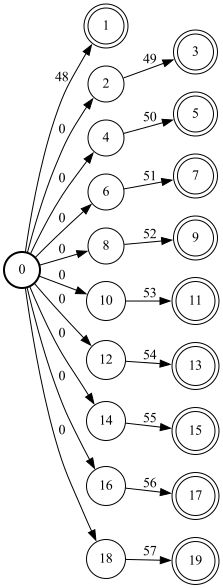

In [3]:
_digit

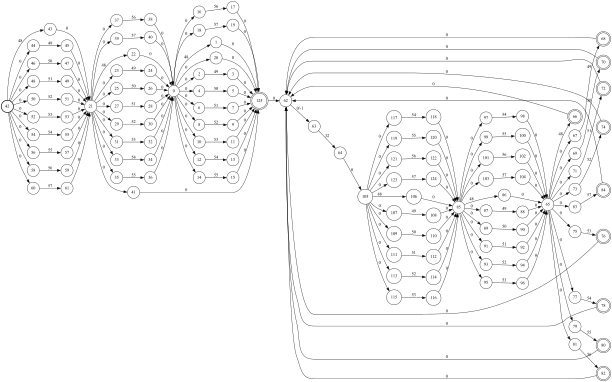

In [4]:
_number_space_separated

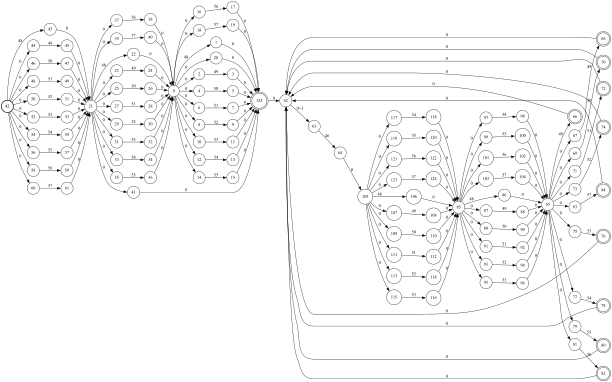

In [5]:
_number_period_separated

### Experiment
#### Following the [example](https://github.com/the-mama-ai/tts-normalization/blob/develop/tts_normalization/classifier/wfst.py) of Petr Fusek

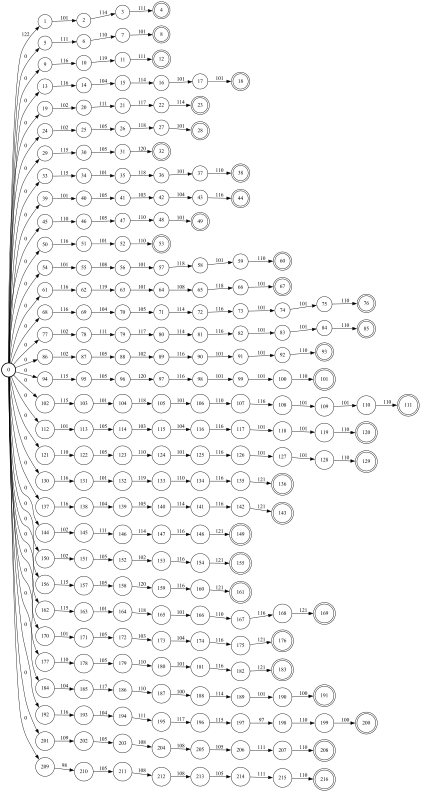

In [6]:
# first of all you need space, period
_space = pn.accep(" ")
_mayspace = pn.closure(_space, 0, 1)

_period = pn.accep(".")
_thousand_separator = _period

# you also need the english letters
_english_letters_upper = pn.string_map([chr(i) for i in range(65, 91)])
_english_letters_lower = pn.string_map([chr(i) for i in range(97, 123)])

_english_letters = pn.union(_english_letters_lower, _english_letters_upper)

# if you want to extract numbers (digits) from text you need to create a FST object containing all the known numbers: [0-9]
# with these digits you can create all possible numbers
_digit = pn.union(*string.digits)

# So maybe you have to do the same with text-numbers [zero-nine]
# when you have text-numbers, you need more
# zero-twenty, thirty, forty, ..., hundred, thousand, millin, billion, ..., you get it
# you need all these text-numbers to compose all possible numbers with text
list_of_nums = ["zero", "one", "two", "three", "four", "five", "six", "seven", "eight", "nine", "ten", 
                "eleven", "twelve", "thirteen", "fourteen", "fifteen", "sixteen", "seventeen", "eighteen", "nineteen",
               "tewnty", "thirty", "forty", "fifty", "sixty", "seventy", "eighty", "ninety",
               "hundred", "thousand", "million", "billion"]
_nums = pn.union(*list_of_nums)
_nums

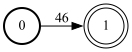

In [7]:
_thousand_separator

## PyJSGF

In [8]:
import jsgf
from jsgf import PublicRule, Literal, Grammar

# Create a public rule with the name 'hello' and a Literal expansion
# 'hello world'.
rule = PublicRule("hello", Literal("hello world"))

# Note that the following creates the same rule:
rule = PublicRule("hello", "hello world")

# Create a grammar and add the new rule to it
grammar = Grammar()
grammar.add_rule(rule)

# Compile the grammar using compile()
# compile_to_file(file_path) may be used to write a compiled grammar to
# a file instead.
# Compilation is not required for finding matching rules.
# print(grammar.compile())

# Find rules in the grammar that match 'hello world'.
matching = grammar.find_matching_rules("hello world")
print("Matching: %s" % matching[0])
print(matching)


Matching: PublicRule(name='hello', expansion=Literal('hello world'))
[PublicRule(name='hello', expansion=Literal('hello world'))]


## ANTLR

In [9]:
from antlr4 import *
# https://raw.githubusercontent.com/antlr/antlr4/master/doc/python-target.md

ModuleNotFoundError: No module named 'antlr4'

## SpaCy

In [10]:
import spacy

nlp = spacy.load('en_core_web_sm')

def extract_dates(text):
    doc = nlp(text)
    results = [(ent.text, ent.label_) for ent in doc.ents]
    return results

texts = [
    "Today it is March 31st",
    "Today it is March 31",
    "Today it is third of March",
    "Today it is three of March",
    "Today it is the third day of March",
    "The temperature today is minus ten degrees Celsius",
    "I want two point five kilos of apples", 
    "I want twenty two oranges",
    "December fifth two thousand and twenty three"
]

for t in texts:
    print(extract_dates(t))
# https://spacy.io/usage/rule-based-matching

[('Today', 'DATE'), ('March 31st', 'DATE')]
[('Today', 'DATE'), ('March 31', 'DATE')]
[('Today', 'DATE'), ('third', 'ORDINAL')]
[('Today', 'DATE'), ('three', 'CARDINAL')]
[('Today', 'DATE'), ('the third day of March', 'DATE')]
[('today', 'DATE'), ('ten degrees', 'QUANTITY')]
[('two point five', 'CARDINAL')]
[('twenty two', 'CARDINAL')]
[('December fifth two thousand and twenty three', 'DATE')]


In [32]:
import datefinder
from word2number import w2n

text_1 = "Tuesday"
matches = datefinder.find_dates(text_1)
for match in matches:
    print(match)
    
text_2 = "six point nine hundred"
match = w2n.word_to_num(text_2)
print(match)

900


In [11]:
import spacy

nlp = spacy.load('en_core_web_sm')
ruler = nlp.add_pipe("entity_ruler")
patterns = [{"label": "NUMBER", "pattern": [{"TEXT": {"REGEX": r"^(|-?\d+)$/gm"}}]}]
ruler.add_patterns(patterns)

doc = nlp("I want to buy 22 apples")
print([(ent.text, ent.label_) for ent in doc.ents])

[('22', 'CARDINAL')]


## Custom number extractor

In [217]:
NUMBERS_ENGLISH = {
    'zero': 0,
    'one': 1,
    'two': 2,
    'three': 3,
    'four': 4,
    'five': 5,
    'six': 6,
    'seven': 7,
    'eight': 8,
    'nine': 9,
    'ten': 10,
    'eleven': 11,
    'twelve': 12,
    'thirteen': 13,
    'fourteen': 14,
    'fifteen': 15,
    'sixteen': 16,
    'seventeen': 17,
    'eighteen': 18,
    'nineteen': 19,
    'twenty': 20,
    'thirty': 30,
    'forty': 40,
    'fifty': 50,
    'sixty': 60,
    'seventy': 70,
    'eighty': 80,
    'ninety': 90,
    'hundred': 100,
    'thousand': 1000,
    'million': 1000000,
    'billion': 1000000000,
    'point': '.',
    'minus': '-',
    'comma': ','
}
SECTION_WORDS = ['quintillion', 'quadrillion', 'trillion', 'billion', 'million', 'thousand']
ALL_SEPARATORS = SECTION_WORDS + ['point']
NUMBER_WORDS = list(NUMBERS_ENGLISH.keys()) + SECTION_WORDS + ['hundred']
NUMBER_SAFE_WORDS = NUMBER_WORDS + ['and', '&']
DECIMAL_WORDS = ['zero', 'one', 'two', 'three', 'four', 'five', 'six', 'seven', 'eight', 'nine']

In [218]:
def _number_formation(number_strings):
    """
    function to form numeric multipliers for million, billion, thousand etc.
    input: list of strings
    return value: integer
    """
    if not number_strings:
        return 1  # to correctly handle "a hundred and twelve", "thousand", etc
    hundred_index = number_strings.index('hundred') if 'hundred' in number_strings else -1
    number = 0
    if hundred_index >= 0:
        number = 100 * _number_formation(number_strings[0:hundred_index])
        number_strings = number_strings[hundred_index + 1:]
    number += sum([NUMBERS_ENGLISH[word] for word in number_strings])
    return number


def _get_decimal_sum(decimal_digit_words):
    """
    function to convert post decimal digit words to numerial digits
    input: list of strings
    output: double
    """
    decimal_number_str = []
    for dec_word in decimal_digit_words:
        if dec_word not in DECIMAL_WORDS:
            return 0
        else:
            decimal_number_str.append(NUMBERS_ENGLISH[dec_word])
    final_decimal_string = '0.' + ''.join(map(str, decimal_number_str))
    return float(final_decimal_string)

In [219]:
def word_to_num(number_sentence):
    """
    function to return integer for an input `number_sentence` string
    input: string
    output: int or double or None
    """
    if type(number_sentence) is not str:
        raise ValueError(
            "Type of input is not string! Please enter a valid number word (eg. \'two million twenty three thousand and forty nine\')")
    if number_sentence.isdigit():  # return the number if user enters a number string
        return int(number_sentence)
    split_words = number_sentence.replace('-', ' ').replace(',', ' ').lower().split()

    # removing and, & etc.
    clean_numbers = [word for word in split_words if word in NUMBER_WORDS]
    return _clean_words_to_num(clean_numbers)


def numwords_in_sentence(sentence):
    if type(sentence) is not str:
        raise ValueError(
            "Type of input is not string! Please enter a valid number word (eg. \'two million twenty three thousand and forty nine\')")

    # TODO: some way to tell the difference between "one thousand, two hundred, and three" = 1203 and
    # TODO  "four, seven, twelve, three" = "4, 7, 12, 3"
    number_sentence = sentence.replace('-', ' ').replace(',', ' ').lower()
    split_words = number_sentence.strip().split()  # strip extra spaces and split sentence into words

    last_found_index = 0
    new_sentence = ''
    i = 0
    while i < len(split_words):
        if split_words[i] in NUMBER_WORDS:
            num_words = split_words[i - 1:i + 1] if i > 0 and split_words[i - 1] == 'a' else [split_words[i]]
            clean_words = [split_words[i]]
            while i + 1 < len(split_words) and split_words[i + 1] in NUMBER_SAFE_WORDS:
                i += 1
                num_words.append(split_words[i])
                if split_words[i] in NUMBER_WORDS:
                    clean_words.append(split_words[i])
            num = _clean_words_to_num(clean_words)
            replace_start, replace_end = _get_replaceable(number_sentence, num_words, last_found_index)
            new_sentence += sentence[last_found_index:replace_start] + str(num)
            last_found_index = replace_end
        i += 1

    new_sentence += sentence[last_found_index:]
    
    return new_sentence


def _get_replaceable(sentence, clean_words, last_found_index):
    start = sentence[last_found_index:].find(clean_words[0]) + last_found_index
    end = start + len(clean_words[0])
    for word in clean_words[1:]:
        end += sentence[end:].lower().find(word) + len(word)
    return start, end


def _validate_clean_words(clean_words):
    # Error message if the user enters invalid input!
    if len(clean_words) == 0:
        raise ValueError(
            "No number words were found in the string.")
    # Error if user enters million, billion, thousand or decimal point twice
    if clean_words.count('thousand') > 1 \
        or clean_words.count('million') > 1 \
        or clean_words.count('billion') > 1 \
        or clean_words.count('point') > 1 \
        or clean_words.count('.') > 1 \
        or clean_words.count('minus') > 1 \
        or clean_words.count("-") > 1:
        raise ValueError(
            "Redundant number word! Please enter a valid number word (eg. two million twenty three thousand and forty nine)")
        
    separators = list(filter(lambda x: x in ALL_SEPARATORS, clean_words))
    sorted_seps = sorted(separators, key=lambda i: ALL_SEPARATORS.index(i))
    if sorted_seps != separators:
        raise ValueError(
            "Malformed number! Something is out of order here.")

        
def _clean_words_to_num(clean_words):
    _validate_clean_words(clean_words)
    negative_number = False
    clean_decimal_numbers = []
    # separate decimal part of number (if exists)
    if clean_words.count('point') == 1:
        clean_decimal_numbers = clean_words[clean_words.index('point') + 1:]
        clean_words = clean_words[:clean_words.index('point')]
        
    # separate negative part of number (if exists)
    if clean_words.count('minus') == 1:
        negative_number = True
        # del clean_words[clean_words.index('minus')]
        clean_words.remove('minus')
    if clean_words.count('-') == 1:
        negative_number = True
        # del clean_words[clean_words.index('minus')]
        clean_words.remove('-')
        
    total_sum = 0  # storing the number to be returned
    print(f"clean words: {clean_words}")
    if len(clean_words) > 0:
        for word in SECTION_WORDS:
            word_index = clean_words.index(word) if word in clean_words else -1
            if word_index > -1:
                # print(clean_words[:word_index])
                total_sum += _number_formation(clean_words[:word_index])
                clean_words = clean_words[word_index + 1:]
            total_sum *= 1000
        if clean_words:
            total_sum += _number_formation(clean_words)
    
    # adding decimal part to total_sum (if exists)
    if len(clean_decimal_numbers) > 0:
        decimal_sum = _get_decimal_sum(clean_decimal_numbers)
        total_sum += decimal_sum
    
    # if len(clean_negative_numbers) > 0:
    if negative_number:
        total_sum = f"-{total_sum}"
        
    return total_sum

In [220]:
t = "four three minus seven million"
print(word_to_num(t))

clean words: ['four', 'three', 'seven', 'million']
-14000000
